### BIO-210: Projects in Informatics for SV
# Python Introduction 3 - Scikit-learn

Scikit-learn is a python library offering a set of tools for data mining, data analysis and machine learning (https://scikit-learn.org/stable/). Today you will learn how to load a dataset and how to perform some elementary exploration and visualization. You will then apply two important data analysis techniques: a clustering algorithm (k-means) and linear regression. Enjoy!

In [22]:
import sklearn as sk
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
import sklearn.model_selection as cv
import numpy as np
import scipy as sp

# We will use a custom library with visualizations developed for this exercise
import lib.viz as viz

Today we will make plotting easy for you, as the lesson about visualization will come later in this course. For the moment, just call the function <code>viz.plot()</code> and give it the following arguments: x, y, color, plot_type ('line' or 'scatter'). Here follows a minimal example:

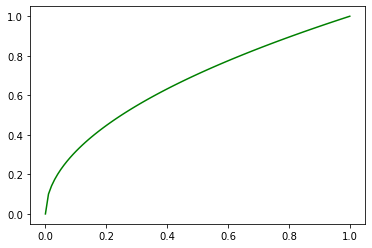

In [23]:
x = np.linspace(0, 1, 100)
y = np.sqrt(x)
viz.plot(x, y, 'green', 'line')

<code>sklearn.datasets</code> is the scikit-learn module to handle sets of data. It includes some toy dataset to experiment with your algorithms, but it also allows you to load real-world datasets or to generate data with specific structures, as in the following example:

(100, 2) (100,) <class 'numpy.ndarray'>


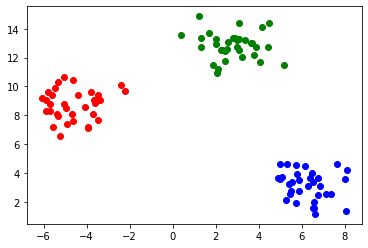

In [24]:
X, y = sk_data.make_blobs(n_samples=100, centers=3, n_features=2, center_box=(-30.0, 30.0), random_state=0)
print(X.shape, y.shape, type(y))

viz.plot(x = X[y==1,0], y = X[y==1,1], color='blue', plot_type='scatter')
viz.plot(x = X[y==0,0], y = X[y==0,1], color='green', plot_type='scatter')
viz.plot(x = X[y==2,0], y = X[y==2,1], color='red', plot_type='scatter')

## Clustering (k-means)

The k-means algorithm clusters data by trying to separate samples in k groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

You remember the bonus exercise from last week?
Now we want to first implement k-means with numpy and then have a look on how to do it with scikit-learn!

**Exercise 1**. Implement k-means clustering to group features related to potential breast cancer masses. Clustering algorithms are used to group data that are similar to each other. In this case we would like to create 2 clusters. If the features are meaningful, each group should include a majority of positive (breast cancer) or negative (non breast cancer) outcomes. Proceed as follows:

1 - Run the cell below, which downloads the dataset and saves the breast cancer features and target labels (cancer / non-cancer)

In [25]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

features = data.data
target = data.target
print("Shape of the feature matrix: ", features.shape)
print("Shape of the label vector: ", target.shape)

Shape of the feature matrix:  (569, 30)
Shape of the label vector:  (569,)


2 - Normalize the features by subtracting the mean from each column and dividing it by its standard deviation. Normalizing the features is a standard way to make the clustering robust to the scale of the features. You can use the relevant <code>numpy</code> functions to do so:

In [26]:
# Your code here
m = np.mean(features, axis=0)
s = np.std(features, axis=0)
norm_features = (features - m) / s
print("Shape of the normalized feature matrix: ", norm_features.shape)

Shape of the normalized feature matrix:  (569, 30)


3 - Each cluster is characterized by a centroid, which is its center of mass. The k-means algorithm will start from two random centroids and iteratively update their values. Define the initial values of the centroids by creating 2 vectors of size equal to the number of features, containing random values sampled from a standard normal distribution.

In [27]:
# Your code here

# Init the centroids
c_0 = np.random.randn(features.shape[1])
c_1 = np.random.randn(features.shape[1])

# Init the cluster vector - the old one is to check convergence
clusters_old = np.zeros(features.shape[0])
clusters = np.ones(features.shape[0])

Now define the iteration loop, which should run until the centroids do not change their value for two consecutive iterations (or the cluster assignment does not change for two consecutive iterations). In each step:

4 - Assign each element of the dataset to the closest centroid. Measure the distance between each centroid and an element with the standard euclidean distance. If the element is closer to the centroid 0, then it belongs to the cluster 0. Otherwise it belongs to the cluster 1. Run this assignment for all the elements.

5 - Update the centroids. They are the average of all the elements assigned to their cluster. Hint: if <code>features</code> is your features matrix and <code>clusters</code> the vector of the cluster assignment, you can get the features of the elements in a certain cluster with the code <code>features[clusters == cluster_id]</code>

Verify that the algorithm converges in a finite number of steps. Once the clustering is completed, check the distribution of target labels associated to the elements of each cluster (Hint: for both clusters, count the elements with label 0 or 1).  If the distribution is substantially different between the two clusters, it means that this simple algorithm has learnt how to approximately distinguish a cancer mass from a non-cancer one!

In [28]:
# Your code here

it = 0
while (clusters_old != clusters).any():  # Stop if the centroids do not change
    print("Iteration ", it)
    clusters_old = clusters.copy()
    for idx, el in enumerate(norm_features):
        d_0 = np.linalg.norm(c_0 - el)
        d_1 = np.linalg.norm(c_1 - el)
        if d_0 < d_1:
            clusters[idx] = 0
        else:
            clusters[idx] = 1
    c_0 = np.mean(norm_features[clusters == 0], axis=0)
    c_1 = np.mean(norm_features[clusters == 1], axis=0)
    it += 1
    
print("If the algorithm worked, this value should be either close to 0 or close to 1:")
print(np.mean(np.abs(clusters - target)))

Iteration  0
Iteration  1
Iteration  2
Iteration  3
Iteration  4
If the algorithm worked, this value should be either close to 0 or close to 1:
0.08787346221441125


### Now we want to have a look on how to run k-means with scikit-learn:

Clustering of unlabeled data can be performed with the module <code>sklearn.cluster</code>.

One important thing to note is that the clustering algorithms can take different kinds of matrix as input. All the methods accept standard data matrices of shape <code>(n_samples, n_features)</code>.

First we import the KMeans algorithm and a scaler object that helps us normalizing our data.

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Scikit-learn offers two prominent methods to scale our features.
- **Standardization** is a technique where the values are centered around the mean with a unit standard deviation. It is often used if you assume that your data is Gaussian-distributed. If you go back to Exercise 1.2, you can see that we implemented this technique.
- **Normalization** is a technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

Here, we can use the **StandardScaler** from scikit-learn to standardize our data.

In [30]:
sc = StandardScaler()
norm_features = sc.fit_transform(features)

There are 3 functions in all the clustering classes:
- **fit()** is building the model from the training data (e.g. finding the centroids)
- **predict()** is assigning labels to test data after building the model
- **fit_predict()** is doing both in the same data (e.g in kmeans, it finds the centroids and assigns the labels to the dataset)

We are finally ready to run k-means clustering:

In [31]:
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10)
kmeans.fit_predict(norm_features)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

A simple way to check whether the distribution of the two classes (cancer or no-cancer) in each cluster is different is to print the confusion matrix. The confusion matrix for an N classes problem (in our case N=2) is an N x N matrix in which each column represents a cluster and each row a label. If the numbers on one of the diagonal are considerably larger than on the other one, this means that there is a label distribution inbalance between the clusters and therefore the algorithm worked well.

[[ 36 176]
 [339  18]]


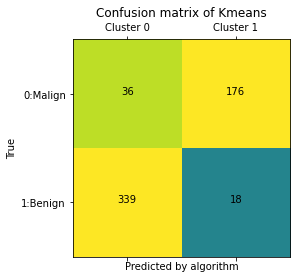

In [32]:
matrix = metrics.confusion_matrix(target, labels)
print(matrix)

# let's visualize it nicely with our custom plotting function
viz.plot(target, labels, '', 'confusion_matrix')

**Exercise 1.1**.
Answer the following questions:
- What does this confusion matrix mean?
- What is the number of false positives?
- What is the number of false negatives?

 *Your answer here*

The confusion matrix is a table in which the rows represent the true labels, while the columns represent the clusters. Therefore, each element of the matrix counts how many data points with a given label are assigned to each cluster. In this exercise we see an imbalance in the distribution of the labels between cluster 0 an 1, because the clustering algorithm has learnt how to approximately group the benign and malign cancer masses together.

Ironically, in medicine a "positive" outcome usually corresponds to a datapoint in which a disease is present, a malign cancer in this specific dataset. The number of false positives corresponds to the number of malign-labelled data points in the cluster where they are the minority. In this case we have 36 malign cancers in cluster 0, while there are 176 malign cancers in cluster 1. We would then define the cluster 1 as "malign cancers" and cluster 0 as "benign cancers". The number of false positives is 36.

Symmetrically, the number of false negatives is the number of benign-labelled data points in the cluster where they are the minority. In this run of the clustering algorithms the number of false negatives is 18.

For an overview of the other metrics functions available in scikit-learn, take a look at sklearn-metrics here: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

**Exercise 2**. Compare the performance of the scikit-learn implementation of k-means with the one of your own implementation. Measure the accuracy of each algorithm to check which implementation did a better job! 

Hint: Computing the accuracy for your numpy k-cluster algorithm might lead you into errors. In fact the algorithm just learns to separate two populations ( cancer vs non cancer) but without knowing the meaning of the label. 

That is also why the algorithm is good if ```metric = np.mean(np.abs(assignment - target)))``` is either close to 0 or to 1. Metric close to zero means that your algorithm has guessed the meaningful labeling. Metric close to one means that it has not guessed the meaning of the labels, but it is still able to distinguish the two populations!

To compute the accuracy, have a look at your cluster assignment. If in the cluster 0 you created there are more elements belonging to the "cancer" group (real target value 1), define your "0" as the label "cancer" and your "1" as the label "non-cancer", otherwise  do the opposite. The label assignment can be different for the two clustering algorithms, because they do not now anything about the meaning of the label. Once you have assigned a prediction to each data point, compute the accuracy with <code>metrics.accuracy_score</code>.

In [43]:
# Your code here

# We consider the accuracy when we consider first the cluster 0 as malign, then as benign. We take the
# one with the higher value
sk_acc = max(metrics.accuracy_score(labels, target), metrics.accuracy_score(1-labels, target))
own_acc = max(metrics.accuracy_score(clusters, target), metrics.accuracy_score(1-clusters, target))

print("accuracy of scikit-learn implementation: ", sk_acc)
print("accuracy of own implementation: ", own_acc)

accuracy of scikit-learn implementation:  0.9050966608084359
accuracy of own implementation:  0.9121265377855887


**Exercise 3.** Usually the performances of the scikit-learn implementation of k-means performs differently from your own implementation. Can you give an explanation of this fact in your own words? (hint: look up the meaning of the parameters <code>init=k-means++</code> and <code>n_init</code>)

 *Your answer here*

init: k-means++ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 
n_init: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

-> as it tried with different centroid seeds and as the cluster centers are chosen and not randomly taken, the final result is often better.

## Linear Regression

In [34]:
from sklearn import linear_model

In your linear algebra class you have studied methods to solve linear systems, even when they are overdetermined. To do that, the standard way to find a solution is to solve the system with the least squares method. Least squares is the basis of an important statistical tool: the linear regression. In fact, datasets often define an overdetermined system, as there are many more data points than features. Of course, scikit-learn offers its own implementation of it. Consider the following linear system


$$Y = \alpha +\beta X +\epsilon$$

We **know**: the dataset $X$ (in the form of a matrix) and the target vector $Y$

We **do not know**: the coefficient vectors $\alpha$ and $\beta$ and the residual noise vecotor $\epsilon$

**Goal:** Given $X$ and $Y$ produce estimates of $\alpha$ and $\beta$ denoted by $\widehat{\alpha}$ and $\widehat{\beta}$ 

Input data comes in the form of pairs $\left(X_i,Y_i\right)$  for $i=1,\ldots ,n$

The **true regression line**: For **every** individual it should hold that:
$$Y_i = \alpha +\beta X_i +\epsilon_i$$


**Error** for the $i$-th data point is: $$ \epsilon_i = Y_i-\alpha-\beta X_i $$


The **estimated regression line** : $$\widehat{Y_i}=\widehat{\alpha}+\widehat{\beta}X_i$$


**Residuals** measure the distance between each observation from the estimated regression line and are defined as follows: $$\widehat{\epsilon_i} = Y_i-\widehat{Y_i}$$

##### Ordinary Least Squares Regression as an optimization problem

**Question**: How do we find $\widehat{\alpha}$ and $\widehat{\beta}$?

**Answer**: By minimizing the residuals, or *sum of squared residuals* :

\begin{eqnarray}
\text{SSR} & = & \sum_{i=1}^n \widehat{\epsilon_i}^2 \\
& = & \sum_{i=1}^n \left(Y_i-\widehat{Y_i}\right)^2
\end{eqnarray}

### Example I:
Generate a dataset using the <code>datasets.makeregression()</code> function:

(100, 1) (100,)


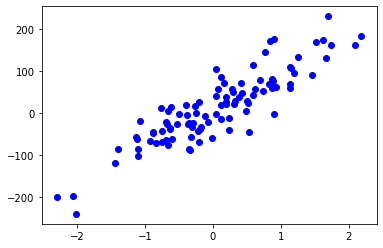

In [35]:
X, y = sk_data.make_regression(n_samples=100, n_features=1, bias=0.1, noise=42, random_state=1)
print(X.shape, y.shape)
viz.plot(X, y, 'blue', 'scatter')

Coefficients: 
 [84.435877] 8.613460433005589
Mean squared error: 1466.62


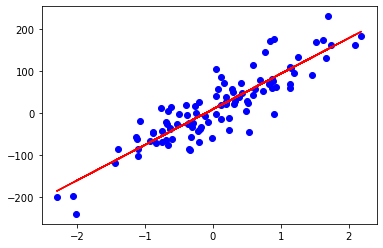

In [36]:
# Create linear regression object
regr = linear_model.LinearRegression()

regr.fit(X, y)
y_pred = regr.predict(X)

# The coefficients
print('Coefficients: \n', regr.coef_, regr.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % metrics.mean_squared_error(y, y_pred))

# Plot outputs
viz.plot(X, y, 'blue', 'scatter')
viz.plot(X, y_pred, 'red', 'line')

### Now it's your turn!

**Exercise 3**: Analyze the **multi-dimensional** california housing data with a linear regression model.

First of all, load the housing data, which is already available in scikit-learn. It also comes with a lengthy description!

In [37]:
# Loading housing data
california = sk_data.fetch_california_housing()
X = california["data"]
y = california["target"]

print(california['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

First step: split the data into training and testing. Hint: use the function <code>cv.train_test_split()</code>

In [38]:
# Your code here
X_train, X_test, y_train, y_test = cv.train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16512, 8) (16512,)
(4128, 8) (4128,)


Now fit a linear regression model on the train data and evaluate it by computing the MSE for both the train and the test:

In [39]:
# Your code here
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train);
# The mean square error
print("Training error: ", metrics.mean_squared_error(regr.predict(X_train),y_train))
print("Test     error: ", metrics.mean_squared_error(regr.predict(X_test),y_test))

Training error:  0.5234413607125448
Test     error:  0.5289841670367246


Print the coefficients for all features:

In [40]:
# Your code here
coefficients = regr.coef_
for i in range(len(coefficients)):
    print(california.feature_names[i], "\t", coefficients[i])

MedInc 	 0.4333334066887782
HouseAge 	 0.009293243374170796
AveRooms 	 -0.09864337387965082
AveBedrms 	 0.593215487010434
Population 	 -7.561925018423745e-06
AveOccup 	 -0.00474516383178534
Latitude 	 -0.4214493359493122
Longitude 	 -0.43416604139119325


Plot the feature *MedInc* and the corresponding regression line:

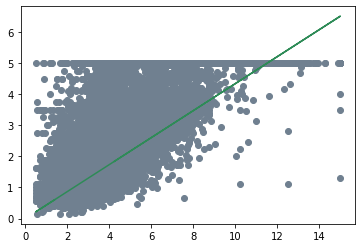

In [41]:
# Your code here
subX_train = X_train[:, 0]
subX_test = X_test[:, 0]
viz.plot(subX_train, y_train, "slategray", 'scatter')
viz.plot(subX_train, coefficients[0]*subX_train, 'seagreen', 'line')

Look at some example predictions on the test set and compare to the ground-truth labels:

In [42]:
# Your code here
y_pred = regr.predict(X_test)
indices = np.random.choice(np.arange(1000), 20, replace=False)
for idx in indices:
    print('Prediction: ', y_pred[idx])
    print('True value: ', y_test[idx])
    print('\n')

Prediction:  0.9358414708581932
True value:  1.355


Prediction:  1.9378790174574476
True value:  2.032


Prediction:  1.791154131012064
True value:  1.976


Prediction:  2.9597497705081963
True value:  3.515


Prediction:  1.7370686678584732
True value:  1.333


Prediction:  1.339872820579501
True value:  1.27


Prediction:  2.9485242475219167
True value:  4.6


Prediction:  2.597061488464462
True value:  2.286


Prediction:  2.7524260248638086
True value:  2.4


Prediction:  0.8838369996725604
True value:  0.656


Prediction:  1.9334408067064786
True value:  2.348


Prediction:  2.507991615760247
True value:  3.086


Prediction:  2.982818453614307
True value:  2.672


Prediction:  2.4657769961925453
True value:  2.043


Prediction:  2.3117892575796617
True value:  2.318


Prediction:  2.169256133427737
True value:  1.785


Prediction:  1.7503392094093329
True value:  0.675


Prediction:  2.1039857987337527
True value:  5.00001


Prediction:  1.982634574666939
True value:  1.541


Pre